# <u>Neural Networks Final Project - India House Dataset Analysis & Neural Network Model</u>

In this project, we conduct an in-depth analysis of historical house price data in Bangalore, India. Utilizing a neural network model, we study the data based on various features to forecast house prices. Effectively predicting house prices is a daunting task beyond mere square footage. Many factors significantly influence the valuation of a property, necessitating a comprehensive approach to modeling and prediction.

# Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import tensorflow as tf
import seaborn as sns
sns.set_style('whitegrid')

# Loading Dataset

We load a dataset named "house data.csv" into a DataFrame named df using Pandas read_csv() function. The info() method is called to get a summary of the dataset, including the data types and missing values.

In [2]:
df = pd.read_csv("house data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


This displays the first five rows of the dataset using the head() method to understand its structure and contents.

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Statistical information about data

In [4]:
df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


We have identified instances where values within the 'total_sqft' feature are presented as ranges rather than single numbers. To address this, we have developed a function designed to parse these values by splitting them into tokens at the '-' symbol, subsequently computing the average of the two numbers. This transformation ensures that the 'total_sqft' column is represented numerically.

In [5]:
df['total_sqft'].value_counts()

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: count, Length: 2117, dtype: int64

In [6]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [7]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)

# <u>Analysis and Visualization:</u>

### A bar plot is created to visualize the relationship between the 'size' feature and the 'price' target variable using Seaborn.

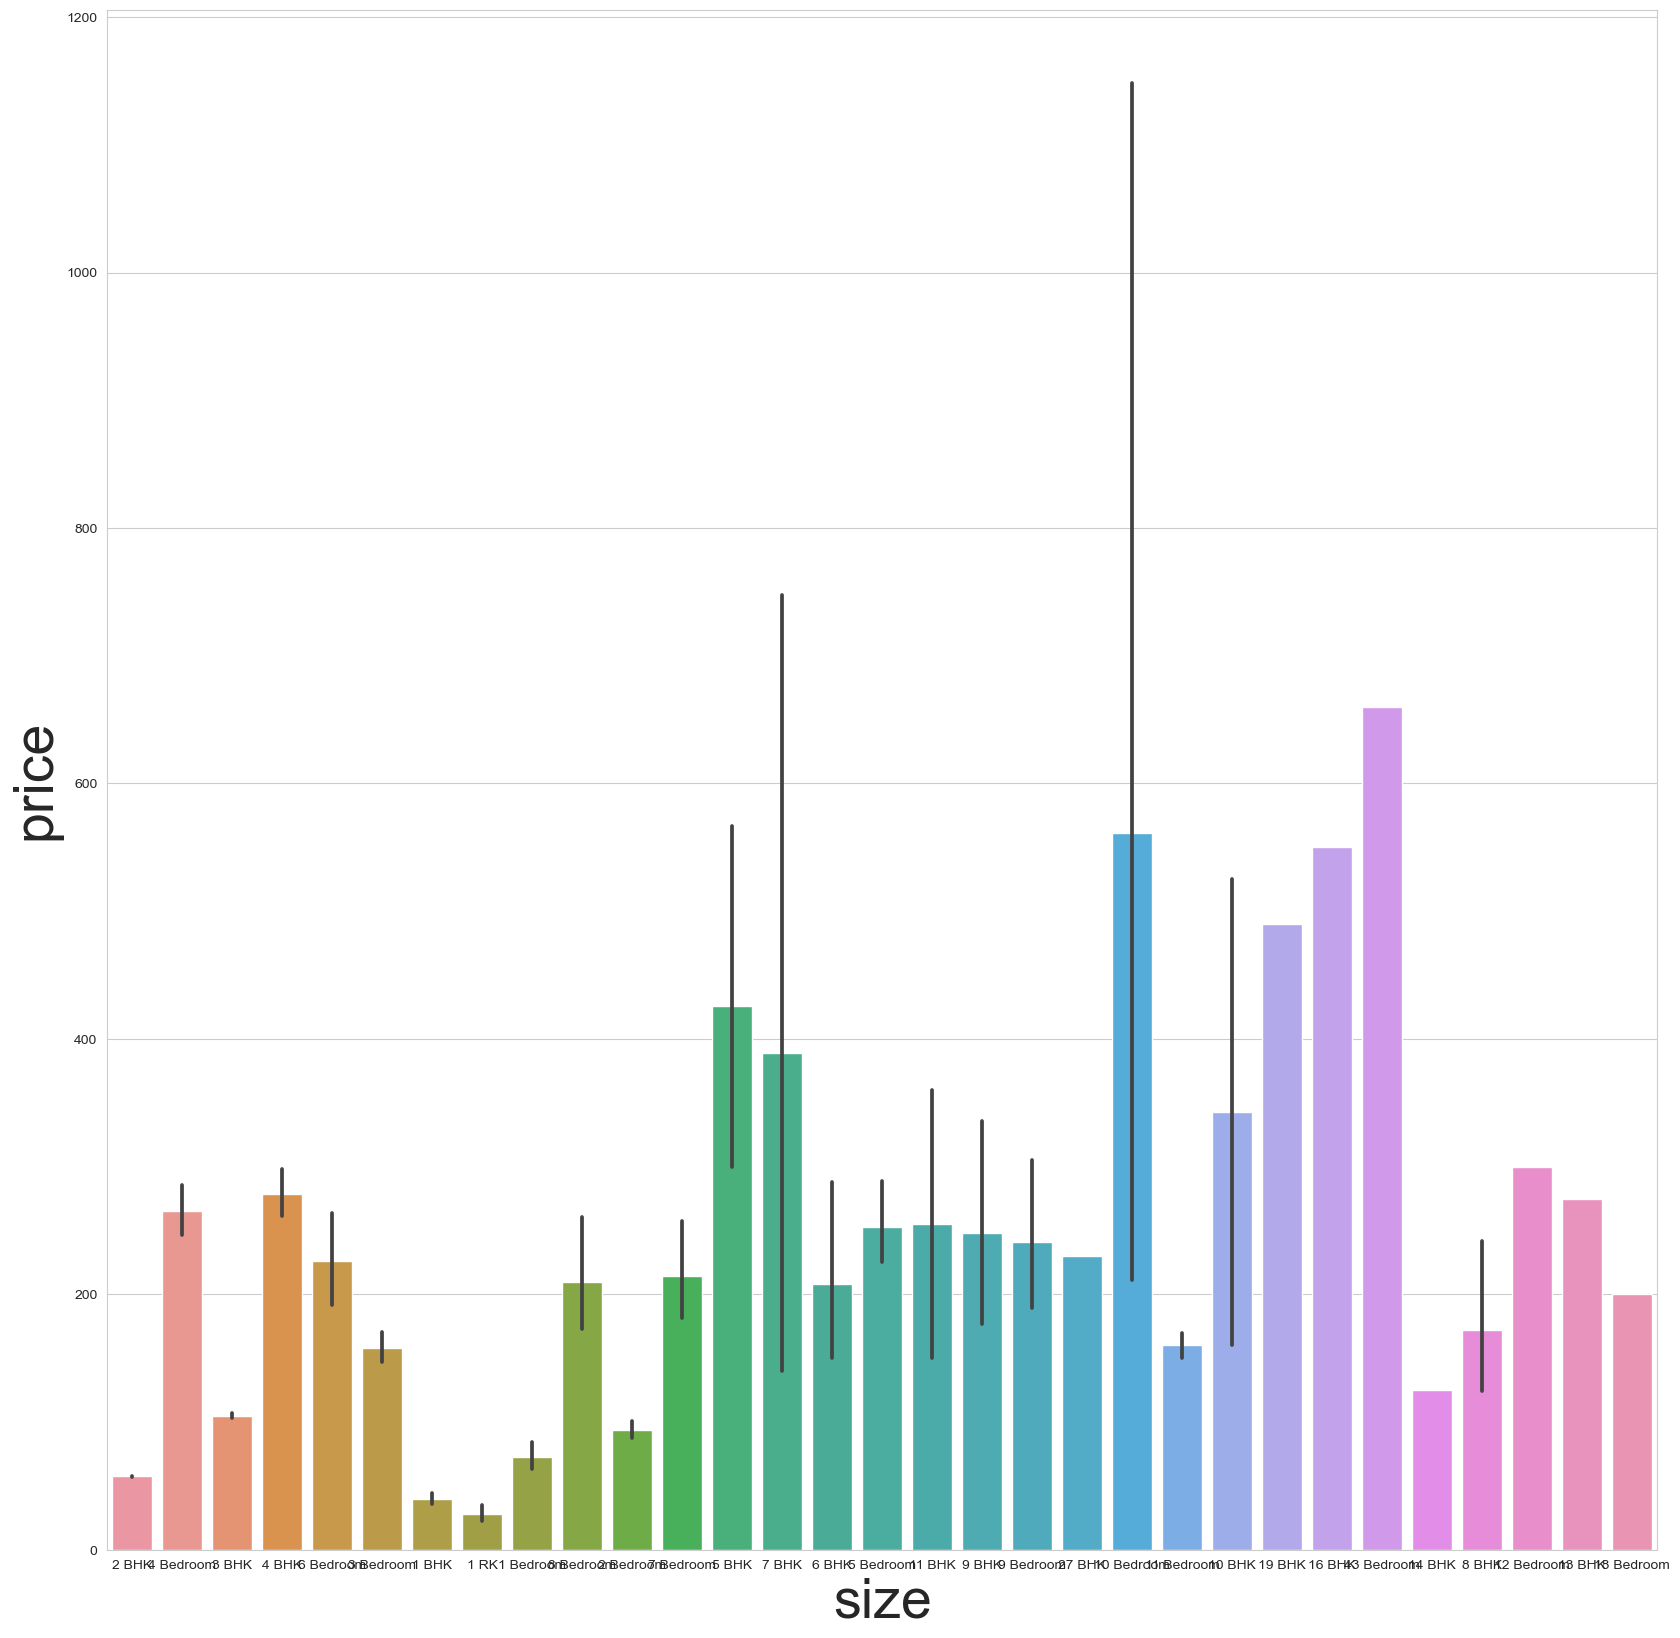

In [8]:
plt.figure(figsize=(20,20))
sns.barplot(x=df['size'], y=df['price'])
plt.ylabel('price', fontsize=40)
plt.xlabel('size', fontsize=40)
plt.show()

### This creates a bar plot for the 'bath' feature against the 'price' target variable.

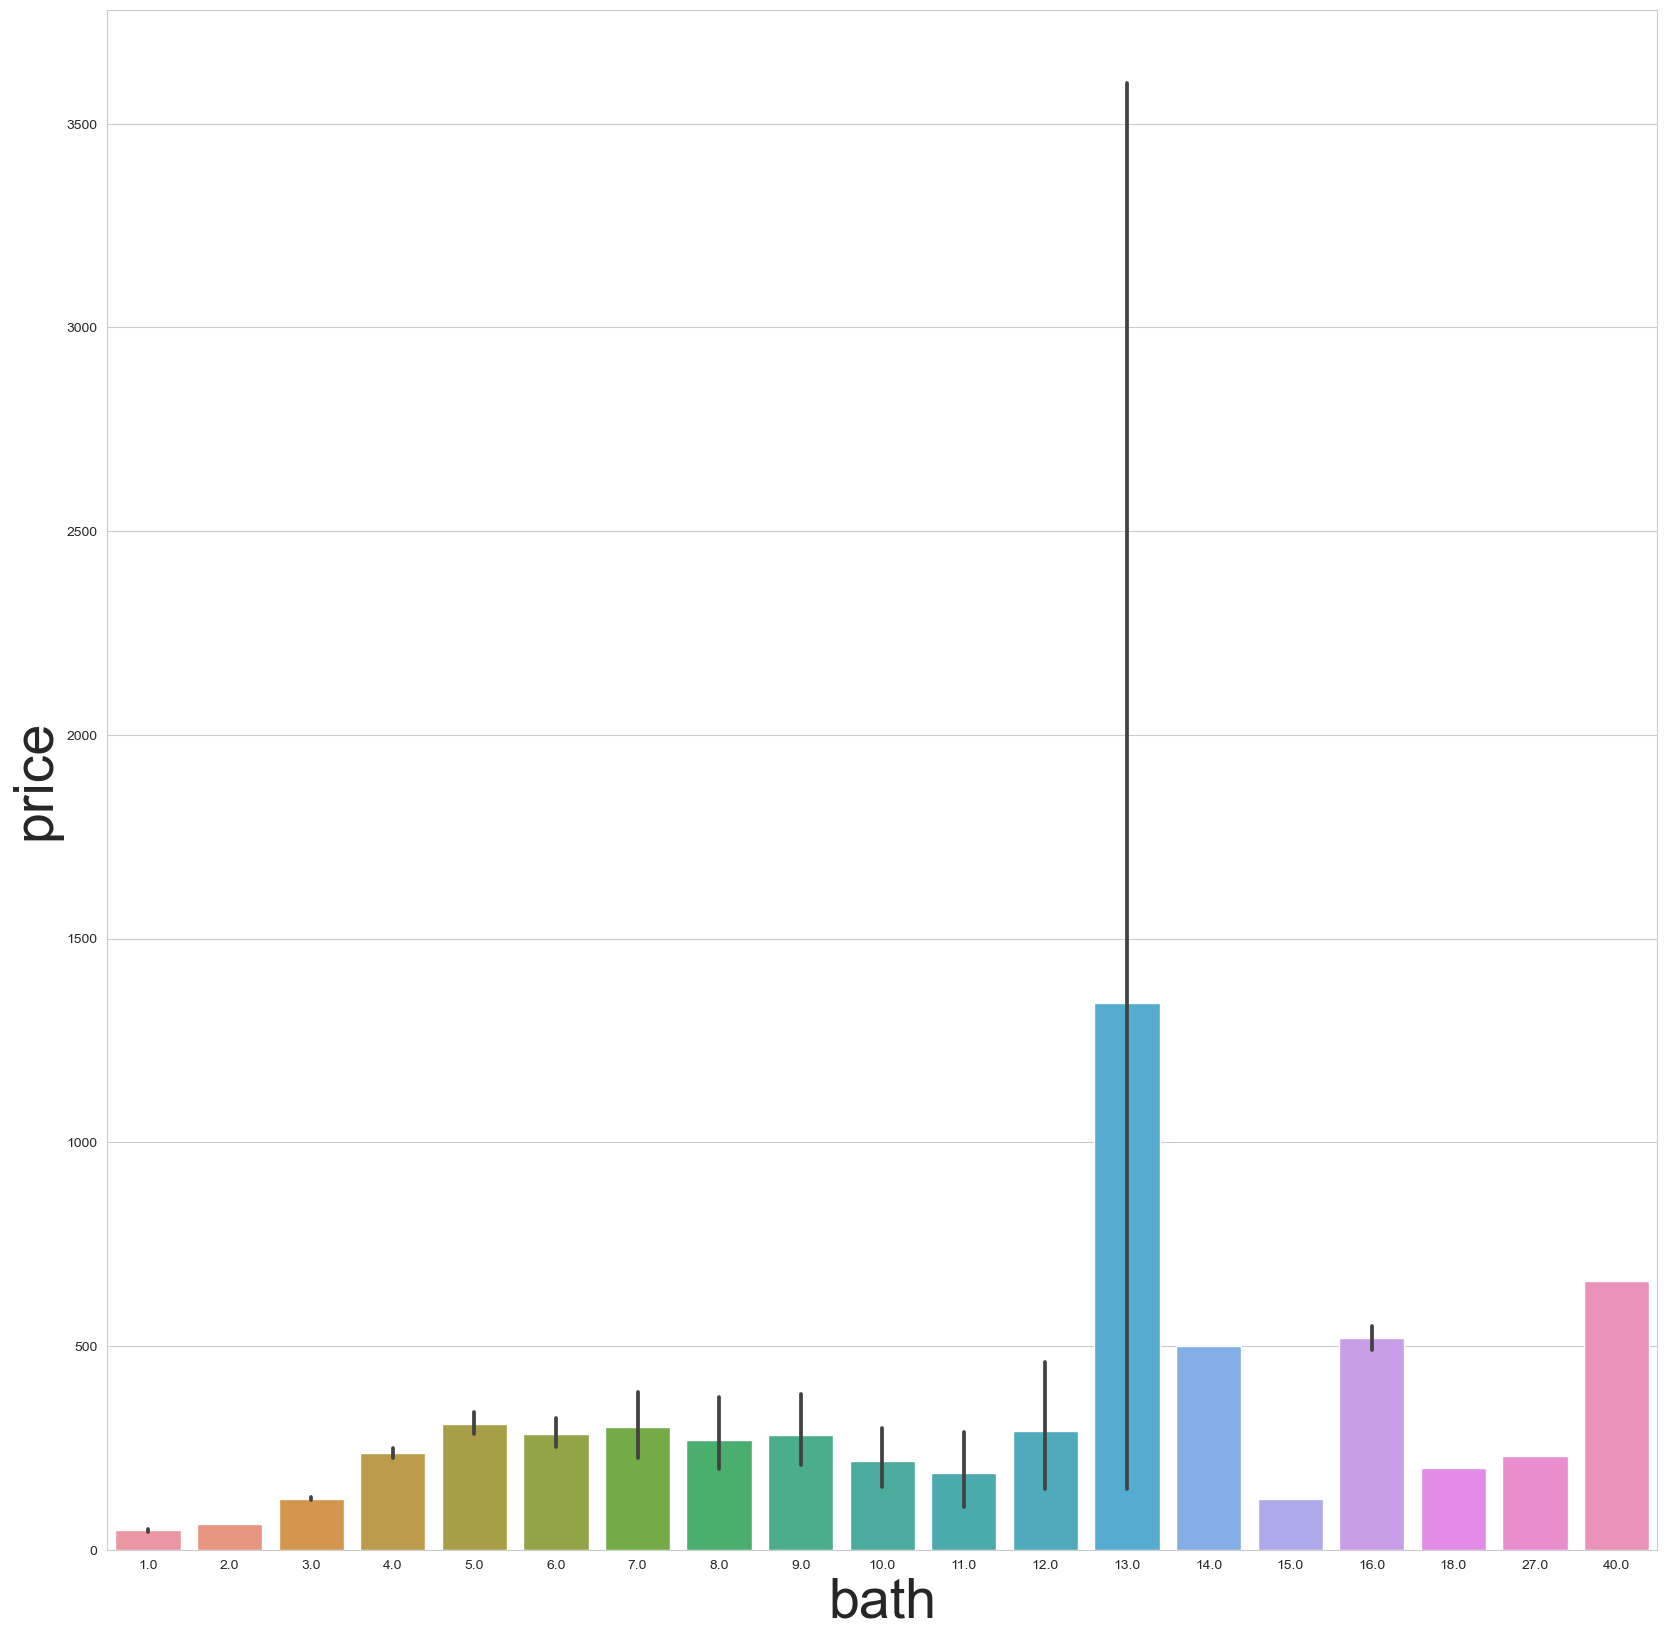

In [9]:
plt.figure(figsize = (20,20))
sns.barplot(x = df['bath'], y = df['price'])
plt.ylabel('price', fontsize = 40)
plt.xlabel('bath', fontsize = 40)
plt.show()

### Another bar plot is generated for the 'balcony' feature against the 'price' target variable.

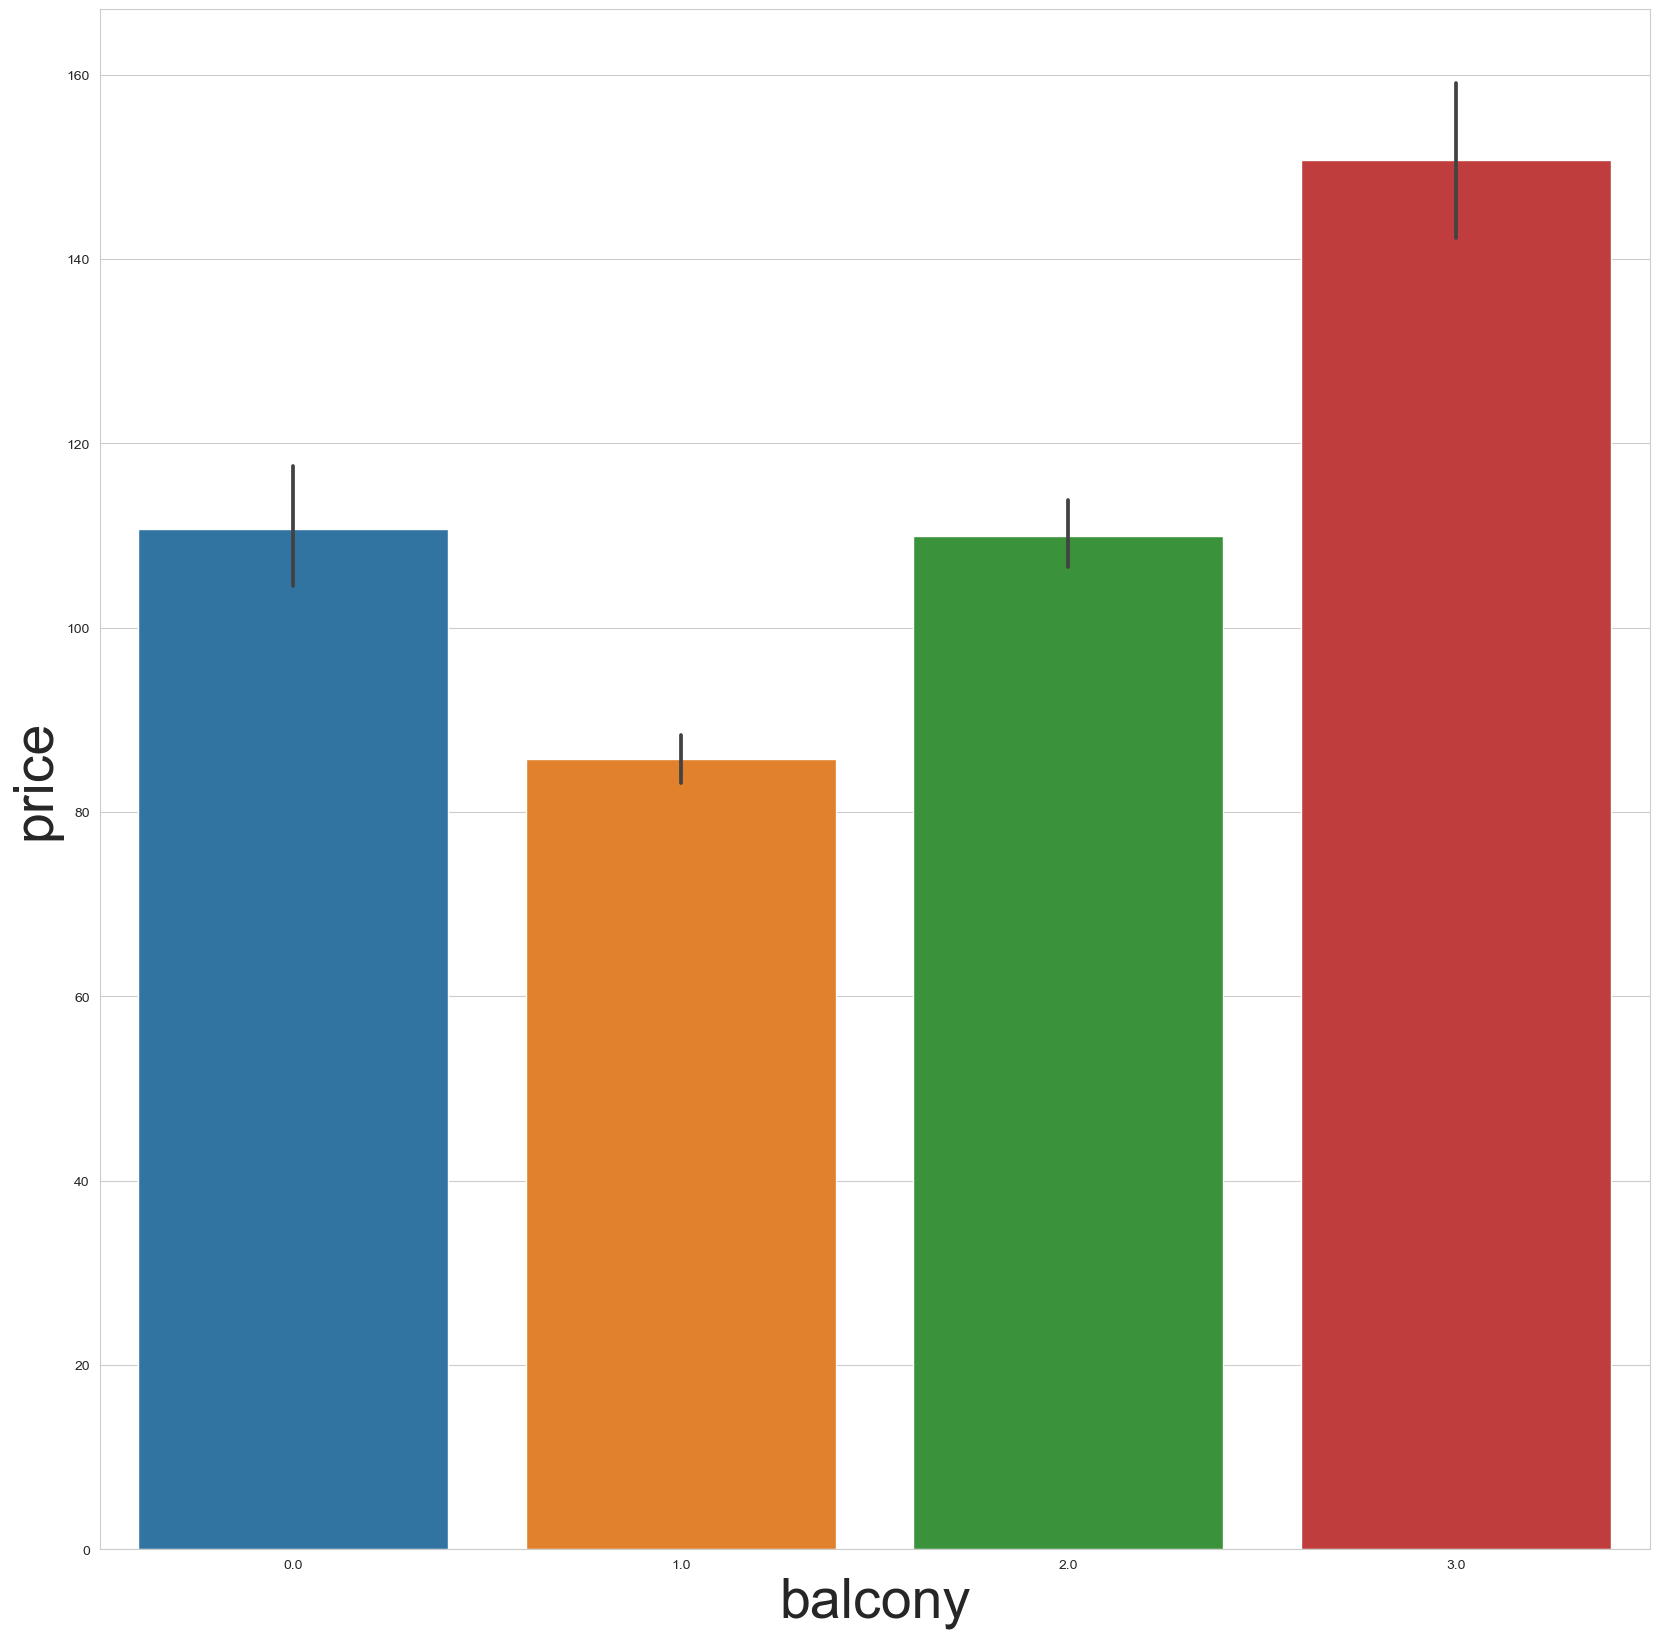

In [10]:
plt.figure(figsize = (20,20))
sns.barplot(x = df['balcony'], y = df['price'])
plt.ylabel('price', fontsize = 40)
plt.xlabel('balcony', fontsize = 40)
plt.show()

### This cell creates a pairplot, showing pairwise relationships and distributions of variables in the dataset.

c:\Users\engyo\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


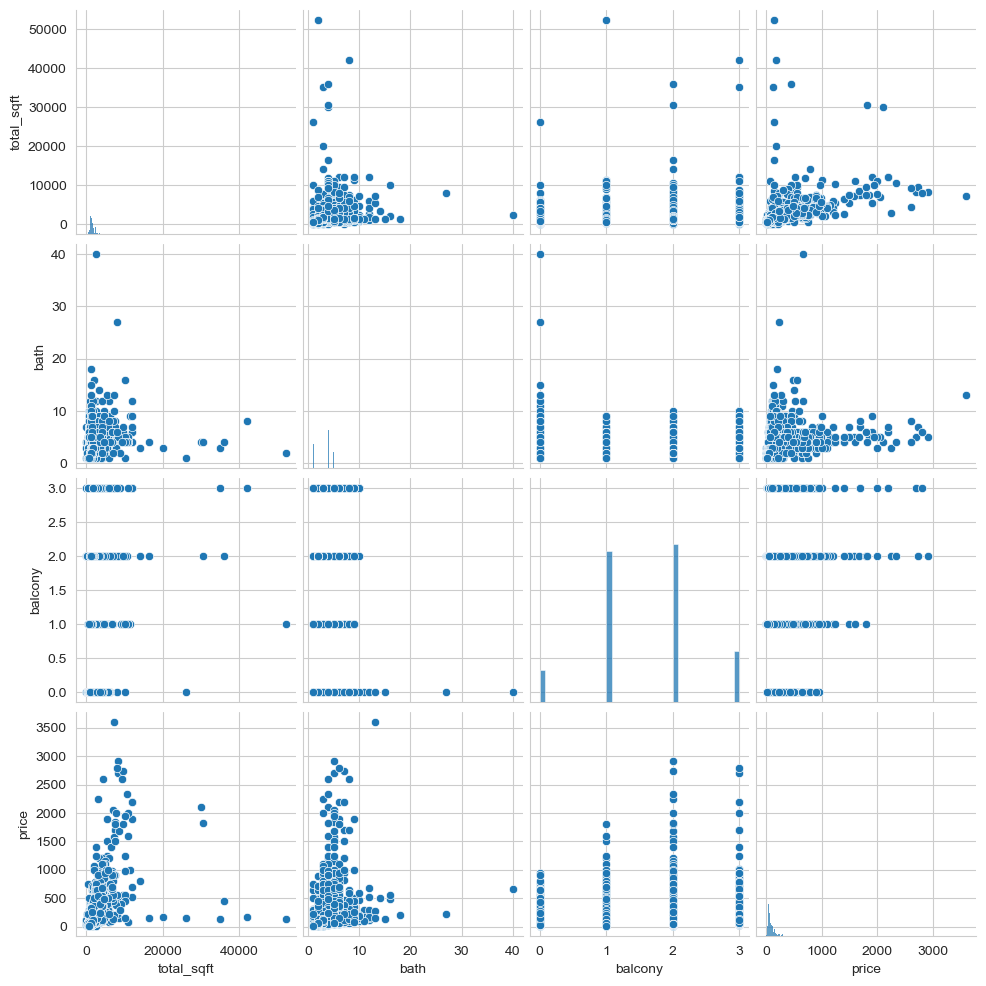

In [11]:
sns.pairplot(df)
plt.show()

# <u>Pre-processing:-</u>

## Handling Missing Values

In [12]:
# Percentage of null values in training set
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage)

Percentage of missing values for training data:
area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.345345
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64


We have observed that a significant proportion (41%) of the 'society' feature contains null values. So, we have made the decision to exclude this feature from our analysis.

In [13]:
df.drop('society', axis=1, inplace=True)

## Handling missing values in other feautures

In [14]:
# Impute the missing values in the "bath" & "balcony" columns with the mean value of the column
mean_bath = round(df['bath'].mean())
mean_balcony = round(df['balcony'].mean())
mean_total_sqft = round(df['total_sqft'].mean())

df['bath'] = df['bath'].fillna(mean_bath)
df['balcony'] = df['balcony'].fillna(mean_balcony)
df['total_sqft'] = df['total_sqft'].fillna(mean_total_sqft)

# Change their datatypes in int
df['bath'] = df['bath'].astype('int64')
df['balcony'] = df['balcony'].astype('int64')

# Impute missing categorical values with mode
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['location'].fillna(df['location'].mode()[0], inplace=True)

## Final missing value check 

In [15]:
# Percentage of null values in training set
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values for training data:")
print(missing_percentage)

Percentage of missing values for training data:
area_type       0.0
availability    0.0
location        0.0
size            0.0
total_sqft      0.0
bath            0.0
balcony         0.0
price           0.0
dtype: float64


### Handling Duplicates

In [16]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("-"*15)

print(df.duplicated().sum())

570
---------------
0


# Handling outliers

Here, we are using a function designed to detect and eliminate outliers. This function accepts three parameters: the dataset, the selected numerical columns, and an optional threshold value (default set to 1.5).

For each numerical column, the function computes the first quartile (q1), third quartile (q3), and interquartile range (IQR). Then, it establishes lower and upper bounds based on the IQR and the provided threshold. Using these bounds, a mask (outliers_mask) is created to identify rows containing outlier values.

The dataset is then updated by removing these outlier rows, and the index is reset using "reset_index" to ensure that the outlier indices are dropped. Finally, the updated dataset is returned.

At the end, the number of removed rows is printed.

In [17]:
numerical_columns = ['bath', 'balcony', 'total_sqft', 'price']

def remove_outliers_IQR(df, numerical_columns, threshold=1.5):
    for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - threshold * IQR
        upper_bound = q3 + threshold * IQR
        outliers_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        df = df[~outliers_mask].reset_index(drop=True)
    return df

# Applying the function to remove outliers
new_data = remove_outliers_IQR(df, numerical_columns)

# Displaying number of outliers removed from each numerical column
for col in numerical_columns:
    outliers_removed = len(df[col]) - len(new_data[col])
    print(f"Number of outliers removed in {col}: {outliers_removed}")

Number of outliers removed in bath: 2571
Number of outliers removed in balcony: 2571
Number of outliers removed in total_sqft: 2571
Number of outliers removed in price: 2571


In [18]:
new_data

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2,1,39.07
1,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2,3,62.00
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3,1,95.00
3,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2,1,51.00
4,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2,1,38.00
...,...,...,...,...,...,...,...,...
10174,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,1675.0,3,2,92.13
10175,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,1050.0,2,2,52.71
10176,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262.0,2,2,47.00
10177,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3,3,112.00


# Perform Scaling

MinMax scaling is applied to numerical features to scale features to a range between 0 and 1.

In [19]:
scaler = MinMaxScaler()
features_to_scale = [column for column in new_data[numerical_columns]]
new_data[features_to_scale] = pd.DataFrame(scaler.fit_transform(new_data[features_to_scale]), columns=features_to_scale)

In [20]:
numerical_columns

['bath', 'balcony', 'total_sqft', 'price']

# Encoding categorical features

In [21]:
new_data = pd.get_dummies(new_data)

# Split data

The dataset is split into features (x) and target (y). Then, the data is further split into training and testing sets using train_test_split() method from Scikit-learn.

In [22]:
x=new_data.drop(columns='price')
y=new_data['price']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
y_train

7959    0.422442
4483    0.314547
3080    0.257553
6325    0.162224
7149    0.496636
          ...   
5734    0.232039
5191    0.320894
5390    0.581112
860     0.298680
7270    0.244732
Name: price, Length: 7125, dtype: float64

## Model (1)

# Defining the Neural Network Models

A Sequential model is created using Keras, consisting of three fully connected layers. The input layer has 4 neurons, the hidden layer has 2 neurons, and the output layer has 1 neuron.

In [24]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(2, activation='sigmoid'),
    tf.keras.layers.Dense(1),

])

# The model is compiled with Adam optimizer and mean squared error loss function.
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# The model is trained on the training data (x_train and y_train) for 50 epochs with a batch size of 32, and 15% of the training data is used for validation.
history1=model1.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.15)

c:\Users\engyo\anaconda3\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0374 - val_loss: 0.0202
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0176 - val_loss: 0.0163
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0131 - val_loss: 0.0167
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - loss: 0.0114 - val_loss: 0.0146
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0111 - val_loss: 0.0149
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0101 - val_loss: 0.0171
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0105 - val_loss: 0.0146
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0097 - val_loss: 0.0147
Epoch 9/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0100 - val_loss: 0.0150
Epoch 10/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0094 - val_loss: 0.0154
Epoch 11/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0091 - val_loss: 0.0155
Epoch 12/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [25]:
loss = model1.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.0153
Test Loss: 0.014690465293824673


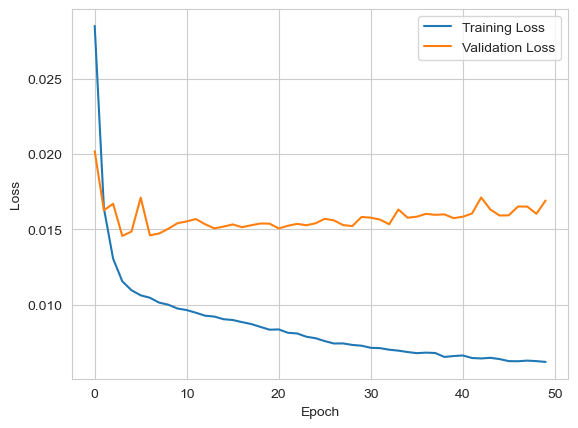

In [26]:
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model (2)

In [27]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model2.compile(optimizer=optimizer, loss='mean_squared_error')

c:\Users\engyo\anaconda3\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
history2 = model2.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.15)

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1682 - val_loss: 0.0222
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0184 - val_loss: 0.0166
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 - val_loss: 0.0158
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0116 - val_loss: 0.0157
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0109 - val_loss: 0.0163
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0106 - val_loss: 0.0148
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0097 - val_loss: 0.0149
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103 - val_loss: 0.0149
Epoch 9/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0108 - val_loss: 0.0205
Epoch 10/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - loss: 0.0100 - val_loss: 0.0148
Epoch 11/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.0093 - val_loss: 0.0148
Epoch 12/50
190/190 ━━━━━━━━━━━━━━━━━━━━

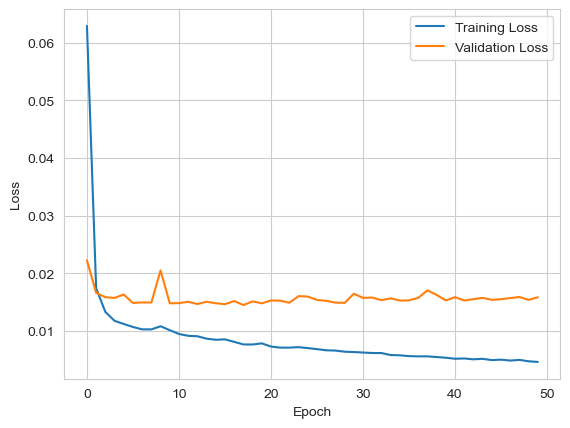

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.0148
Test Loss: 0.01412365771830082


In [29]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = model2.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Model (3)

In [30]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='sigmoid', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dense(1,activation='sigmoid'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model3.compile(optimizer=optimizer, loss='mean_squared_error')

c:\Users\engyo\anaconda3\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
history3 = model3.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.15)

Epoch 1/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4020 - val_loss: 0.3410
Epoch 2/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3057 - val_loss: 0.2749
Epoch 3/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2553 - val_loss: 0.2317
Epoch 4/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2192 - val_loss: 0.2014
Epoch 5/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1875 - val_loss: 0.1786
Epoch 6/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1641 - val_loss: 0.1606
Epoch 7/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1455 - val_loss: 0.1457
Epoch 8/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1356 - val_loss: 0.1331
Epoch 9/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1241 - val_loss: 0.1221
Epoch 10/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1100 - val_loss: 0.1124
Epoch 11/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1021 - val_loss: 0.1039
Epoch 12/50
190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

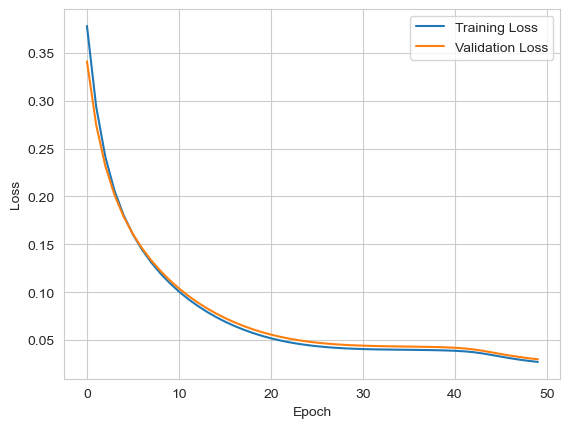

In [32]:
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
loss = model3.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0268
Test Loss: 0.028171619400382042


# From the above models we choose Model 3 to predict the results

# Test Model

In [34]:
y_predict = model3.predict(x_test)
y_predict

96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([[0.3600285 ],
       [0.32427242],
       [0.326378  ],
       ...,
       [0.23437509],
       [0.42573744],
       [0.31304142]], dtype=float32)

# Save our model 

In [35]:
# Save the trained model in the native Keras format
tf.keras.models.save_model(model3, "model3.keras")